<a href="https://colab.research.google.com/github/NaHyeon1Kim/Modeling/blob/main/Text_Mining_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 데이터 읽기

In [1]:
!unzip news_small.zip

Archive:  news_small.zip
  inflating: 103/103_1.txt           
  inflating: 103/103_10.txt          
  inflating: 103/103_100.txt         
  inflating: 103/103_101.txt         
  inflating: 103/103_102.txt         
  inflating: 103/103_103.txt         
  inflating: 103/103_104.txt         
  inflating: 103/103_105.txt         
  inflating: 103/103_106.txt         
  inflating: 103/103_107.txt         
  inflating: 103/103_108.txt         
  inflating: 103/103_109.txt         
  inflating: 103/103_11.txt          
  inflating: 103/103_110.txt         
  inflating: 103/103_111.txt         
  inflating: 103/103_112.txt         
  inflating: 103/103_113.txt         
  inflating: 103/103_114.txt         
  inflating: 103/103_115.txt         
  inflating: 103/103_116.txt         
  inflating: 103/103_117.txt         
  inflating: 103/103_118.txt         
  inflating: 103/103_119.txt         
  inflating: 103/103_12.txt          
  inflating: 103/103_120.txt         
  inflating: 103/103_121.

In [2]:
import os
import pandas as pd

files1 = os.listdir('103')

In [3]:
x = []
y = []

def add_file(path):
  with open(path, "r", encoding="utf-8") as f:
    s = f.read()
    x.append(s)

In [4]:
for f in files1:
  add_file("103/"+f)
  y.append(0)

In [5]:
df = pd.DataFrame( {'label':y, 'articles':x})

In [6]:
df.head()

,label,articles
0,0,경제와 문화의 가교 한경[ 김희경 기자 ] 스위스 중부에 있는 할빌 마을에서 지난 ...
1,0,작년 여름부터 ‘10초면 아기발’ 컨셉으로 출시 된지 3개월만에 10만개 이상의 판...
2,0,"서울대병원, 5년간 처방 7,045명 분석구토·간독성·경련 등 29명···환각은 0..."
3,0,동영상 뉴스\n\t\t\n\t\n\n\n\n\t\n\t다시 찾아온 먼지 걱정… 대형...
4,0,아우디코리아는 올해 하반기 신형 'A7'를 출시한다.신형 A7은 4도어 쿠페로 아우...


2. 전처리 및 명사 추출

In [8]:
!pip install konlpy
!pip install tqdm #진행상태를 알려주는 기능 제공

import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm

print(df.isnull().values.any())
train = df.dropna(how='any')
print(train.isnull().values.any())

train['articles'] = train['articles'].str.replace("[^ ㄱ-ㅎㅏ-ㅣ-가-힣]","")

False
False


<ipython-input-8-773edab5fcc2>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  train['articles'] = train['articles'].str.replace("[^ ㄱ-ㅎㅏ-ㅣ-가-힣]","")


In [9]:
train['articles']

0      경제와 문화의 가교 한경 김희경 기자  스위스 중부에 있는 할빌 마을에서 지난 일 ...
1      작년 여름부터 초면 아기발 컨셉으로 출시 된지 개월만에 만개 이상의 판매고를 일으켰...
2      서울대병원 년간 처방 명 분석구토간독성경련 등 명환각은 건서울경제 독감 치료제 타미...
3      동영상 뉴스다시 찾아온 먼지 걱정 대형 산불 주의보앵커 겨울철에 한파 아니면 먼지가...
4      아우디코리아는 올해 하반기 신형 를 출시한다신형 은 도어 쿠페로 아우디의 최신 디자...
                             ...                        
195    용산역 근처 경의선과 중앙선이 오가는 백빈건널목은 삶에 지친 주인공 지안과 동훈이 ...
196    예레미야 장 절본문은 헛된 것을 가르치는 제사장들이 하나님을 업신여기고 멸시했다고 ...
197    기아자동차대표 박한우는 에서 미래 모빌리티의 새로운 가능성을 모색한 실시간 감정반응...
198    사진 위암 발생은 미국 내에서 인종 간의 차이가 크다 한인들은 위암 발생률과 사망률...
199    리버풀위과 맨체스터 시티가 오는 일한국시간 영국 맨체스터 에티다드 스타디움에서 -시...
Name: articles, Length: 200, dtype: object

In [10]:
#빈 리스트에 다른 리스트값을 넣기
lst1 = [ ["첫", "번째", "뉴스"], ["두", "번째", "뉴스"]]
lst2 = []
lst2.append( lst1[0] )

#lst1의 각 값을 출력
for i in lst1:
 print(i)

[ i for i in lst1 ]

['첫', '번째', '뉴스']
['두', '번째', '뉴스']


[['첫', '번째', '뉴스'], ['두', '번째', '뉴스']]

In [12]:
tokenized_data = []

stopwords = ['을', 'ㅋㅋ',
             '부터', '까지' '적', '의','가','이','은',
             '들','는','좀','잘','걍','과','도','를','으로',
             '자','에','와','한','하다', '점', '나']

#형태소 분석기 OKT를 사용한 토큰화 작업
okt = Okt()

for sentence in tqdm(train['articles']):
  tokenized_sentence = okt.nouns(sentence)
  stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
  tokenized_data.append(stopwords_removed_sentence)

len(tokenized_data)

100%|██████████| 200/200 [00:22<00:00,  9.08it/s]


200

In [13]:
tokenized_data

[['경제',
  '문화',
  '가교',
  '한경',
  '김희',
  '경',
  '기자',
  '스위스',
  '중부',
  '마을',
  '지난',
  '일',
  '복장',
  '사람',
  '거리',
  '푸른',
  '잎',
  '갈색',
  '낙엽',
  '가지',
  '등',
  '나무',
  '각',
  '부분',
  '역할',
  '표현',
  '매년',
  '새해',
  '날인',
  '월',
  '일이',
  '마을',
  '전통',
  '행사',
  '미혼',
  '성인',
  '명',
  '초록',
  '갈색',
  '그룹',
  '색깔',
  '복장',
  '초록',
  '집단',
  '봄',
  '생명',
  '갈색',
  '집단',
  '겨울',
  '죽음',
  '상징',
  '오후',
  '거리',
  '행진',
  '마을',
  '사람',
  '인사',
  '옷',
  '사람과',
  '포옹',
  '복',
  '풍속',
  '포옹',
  '새해',
  '분위기',
  '지구촌',
  '김희',
  '경',
  '기자',
  '한경닷컴',
  '바로가기',
  '모바일',
  '한경',
  '구독',
  '신청',
  '네이버',
  '한국',
  '경제',
  '채널',
  '구독',
  '보기',
  '한국',
  '경제',
  '무단',
  '재',
  '및',
  '재',
  '배포',
  '금지'],
 ['작년',
  '여름',
  '초면',
  '아기',
  '발',
  '컨셉',
  '출시',
  '개월',
  '개',
  '이상',
  '판매',
  '셀로몬',
  '발각',
  '질',
  '거제',
  '누적',
  '판매량',
  '개',
  '돌파',
  '단일',
  '쇼핑몰',
  '기준',
  '구매',
  '후기',
  '만',
  '개',
  '이상',
  '기록',
  '셀로몬',
  '발각',
  '질',
  '거제',
  '헬스',
  '앤',
  '뷰티',
  '스토어',
  '올리브

4. 워드클라우드 표현을 위해 토큰 결과에서 중복 제거 후 문자열로 변경

In [14]:
words = []
for q in tokenized_data:
  for v in q:
    if v not in words:
      words.append(v)

words = str(words)

- 워드클라우드 (malgun.ttf를 업로드 필요)

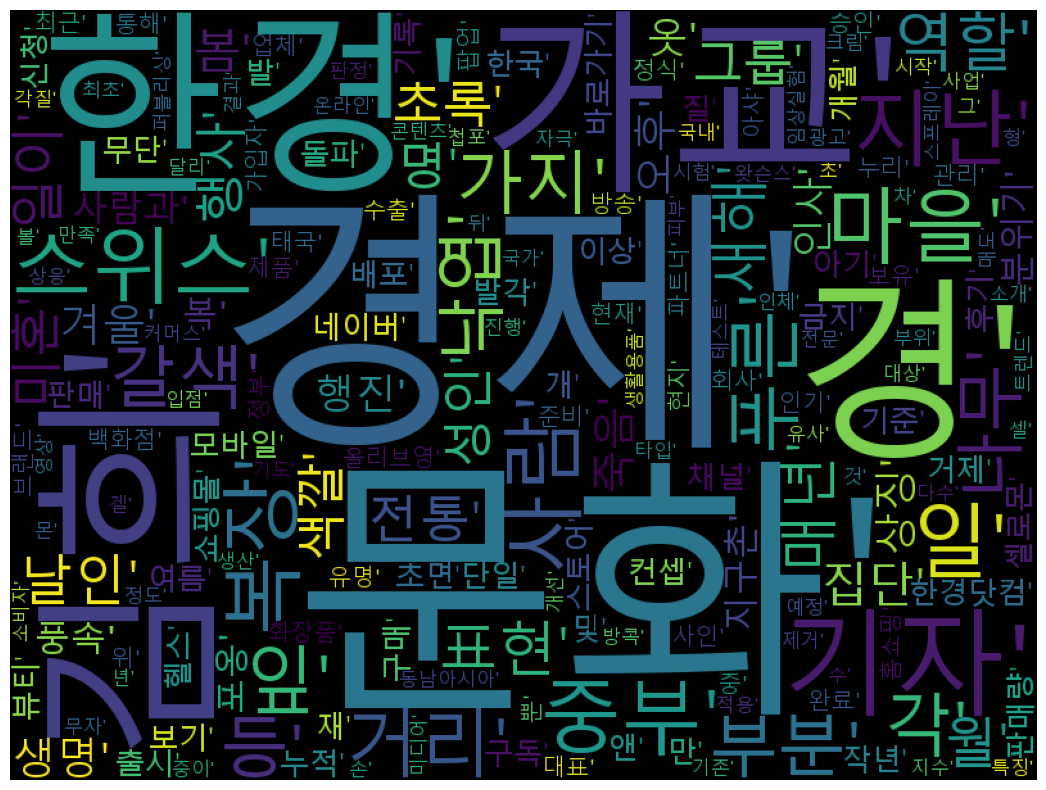

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path='malgun.ttf', background_color="black", width=800, height=600).generate(words)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()